### Ejercicio PCA

Utilizar una librería para calcular las componentes principales e interpretar la PC1 (gráfica y teóricamente). El conjunto de datos europe.csv corresponde a características económicas, sociales y geográficas de 28 países de Europa. 

Las variables son:

- Country: Nombre del país.

- Area: área.

- GDP: producto bruto interno.

- Inflation: inflación anual.

- Life.expect: expectativa de vida media en años.

- Military: presupuesto militar.

- Pop.growth: tasa de crecimiento poblacional.

- Unemployment: tasa de desempleo.

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

C:\Users\facun\AppData\Local\Temp\ipykernel_15796\1577759011.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X.values, labels=X.columns, patch_artist=True)
C:\Users\facun\AppData\Local\Temp\ipykernel_15796\1577759011.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_scaled_df.values, labels=X_scaled_df.columns, patch_artist=True)


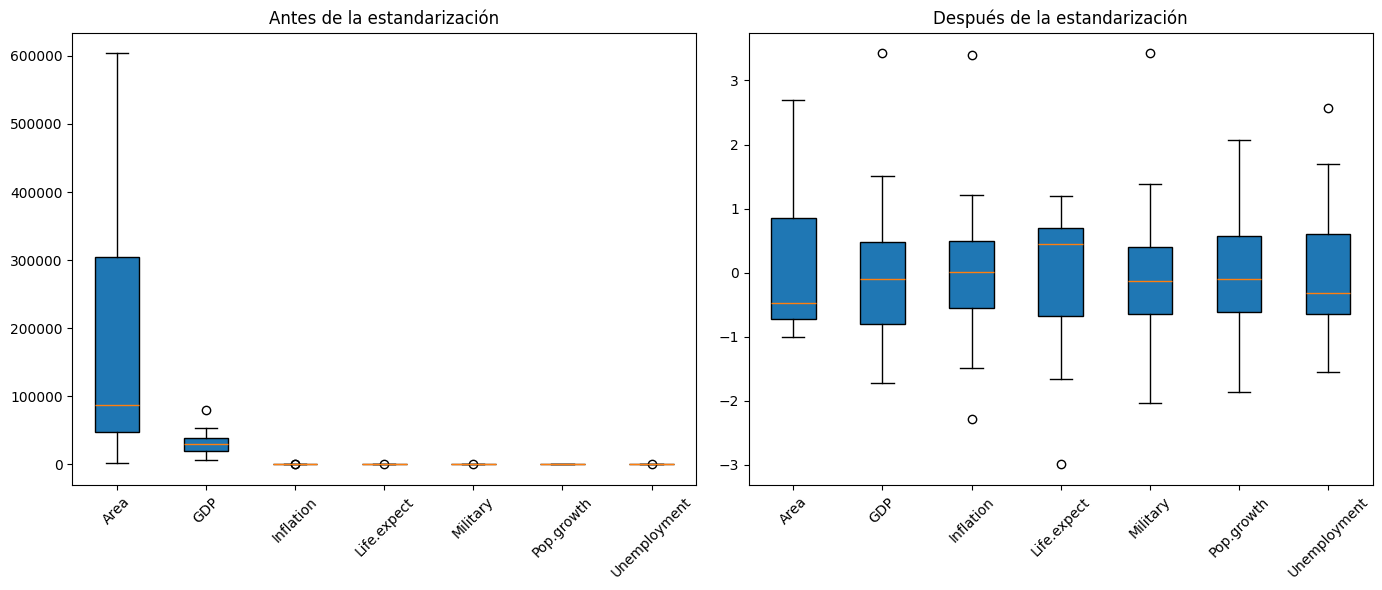

Varianza explicada por cada componente:
- PC1: 0.4610
- PC2: 0.1696
- PC3: 0.1519
- PC4: 0.1101
- PC5: 0.0654
- PC6: 0.0241
- PC7: 0.0179


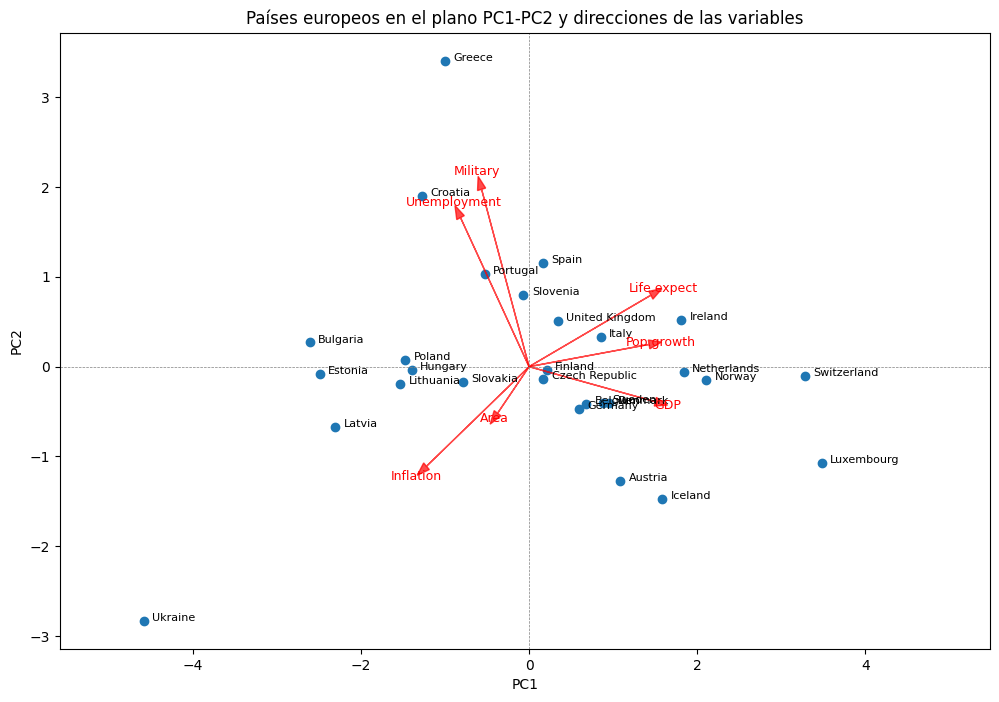

                   PC1       PC2       PC3       PC4       PC5       PC6  \
Area         -0.124874 -0.172872  0.898297  0.044850 -0.324017  0.190118   
GDP           0.500506 -0.130140  0.083956 -0.084255  0.390632  0.638657   
Inflation    -0.406518 -0.369657  0.198195  0.164686  0.689501 -0.323867   
Life.expect   0.482873  0.265248  0.246082  0.026771 -0.101787 -0.606434   
Military     -0.188112  0.658267  0.243679 -0.562375  0.368148  0.035596   
Pop.growth    0.475704  0.082622  0.163697  0.392463  0.347868 -0.120856   
Unemployment -0.271656  0.553204  0.000500  0.701968  0.010159  0.259705   

                   PC7  
Area          0.066643  
GDP          -0.397408  
Inflation    -0.226700  
Life.expect  -0.507031  
Military      0.137310  
Pop.growth    0.671147  
Unemployment -0.244662  


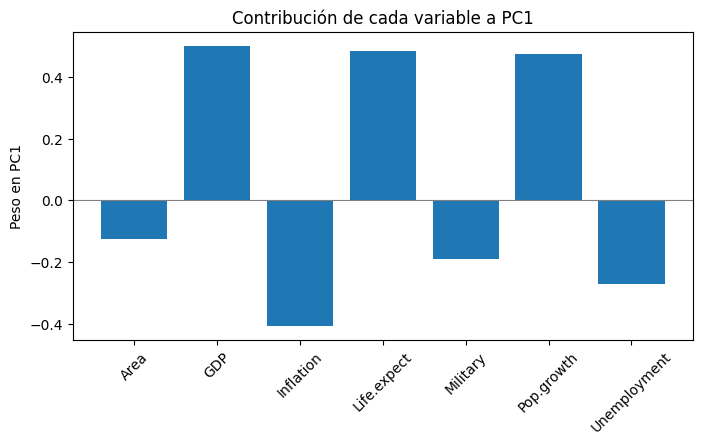

In [47]:
df = pd.read_csv("europe.csv")

# Estandarizar variables numéricas
X = df.drop(columns=["Country"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Boxplots variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Antes de la estandarización
axes[0].boxplot(X.values, labels=X.columns, patch_artist=True)
axes[0].set_title("Antes de la estandarización")
axes[0].tick_params(axis='x', rotation=45)
# Después de la estandarización
axes[1].boxplot(X_scaled_df.values, labels=X_scaled_df.columns, patch_artist=True)
axes[1].set_title("Después de la estandarización")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"- PC{i+1}: {var:.4f}")

# Gráfica de los países en el plano de las dos primeras componentes principales
plt.figure(figsize=(12,8))
# 1. Puntos de los países
plt.scatter(X_pca[:,0], X_pca[:,1])
for i, country in enumerate(df["Country"]):
    plt.text(X_pca[i,0]+0.1, X_pca[i,1], country, fontsize=8)
# 2. Vectores de las variables
loadings = pca.components_.T 
variables = X.columns
scaling_factor = 3  
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i,0]*scaling_factor, loadings[i,1]*scaling_factor, color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings[i,0]*scaling_factor*1.1, loadings[i,1]*scaling_factor*1.1, var, color='r', ha='center', va='center', fontsize=9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Países europeos en el plano PC1-PC2 y direcciones de las variables")
plt.xlim(X_pca[:,0].min()-1, X_pca[:,0].max()+2)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()


loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)
print(loadings)

plt.figure(figsize=(8,4))
plt.bar(loadings.index, loadings["PC1"])
plt.ylabel("Peso en PC1")
plt.title("Contribución de cada variable a PC1")
plt.axhline(0, color='gray', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()


Ahora queremos incorporar un nuevo dato y ver cómo se ve representado por las PCs calculadas. Estandarizamos y proyectamos los datos de Argentina sobre las PCs:

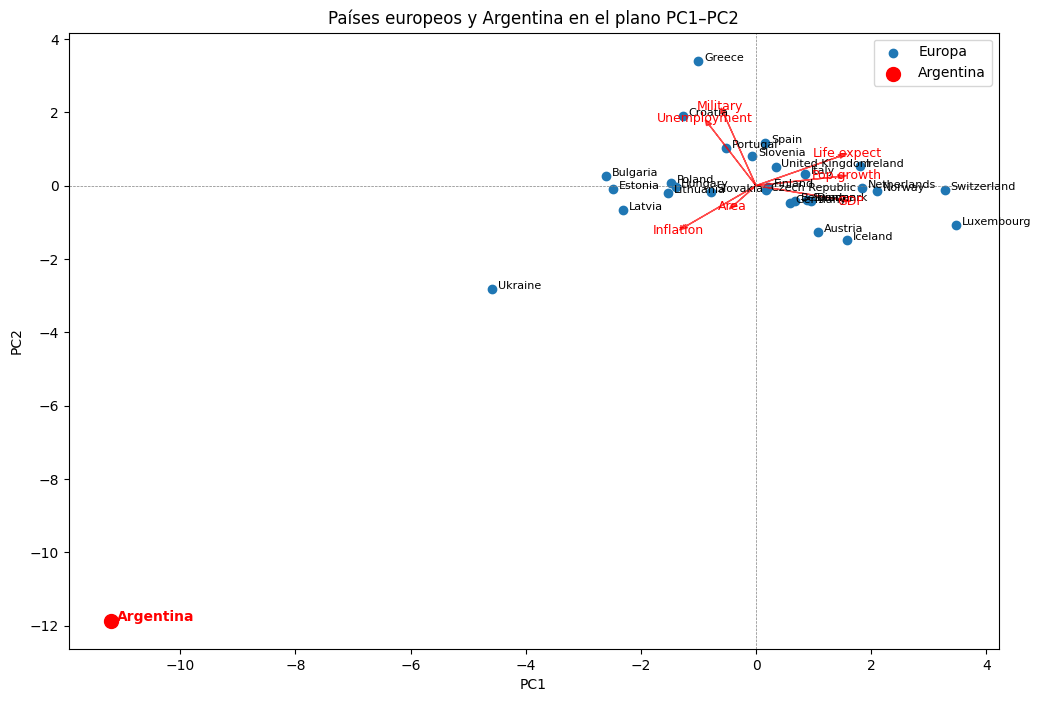

In [48]:
argentina = pd.DataFrame({
    "Area": [2780400],
    "GDP": [12890],
    "Inflation": [33.6],
    "Life.expect": [77.4],
    "Military": [0.6],
    "Pop.growth": [0.3],
    "Unemployment": [7.9]
})

# Escalar usando el mismo scaler que se ajustó con Europa
arg_scaled = scaler.transform(argentina)

# Proyectar en el espacio PCA europeo
arg_pca = pca.transform(arg_scaled)

# Agregar al gráfico existente
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], label="Europa")
for i, country in enumerate(df["Country"]):
    plt.text(X_pca[i,0]+0.1, X_pca[i,1], country, fontsize=8)

# Agregar Argentina
plt.scatter(arg_pca[0,0], arg_pca[0,1], color='red', s=100, label="Argentina")
plt.text(arg_pca[0,0]+0.1, arg_pca[0,1], "Argentina", color='red', fontsize=10, weight='bold')

# Vectores de variables
loadings = pca.components_.T 
variables = X.columns
scaling_factor = 3  
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i,0]*scaling_factor, loadings[i,1]*scaling_factor, color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings[i,0]*scaling_factor*1.1, loadings[i,1]*scaling_factor*1.1, var, color='r', ha='center', va='center', fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Países europeos y Argentina en el plano PC1–PC2")
plt.legend()
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

En cambio, si recalculamos las PCs incluyendo a Argentina, estas cambian notoriamente con el objetivo de minimizar la varianza global del nuevo conjunto, modificándose el espacio:

C:\Users\facun\AppData\Local\Temp\ipykernel_15796\1781088895.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_arg.values, labels=X_arg.columns, patch_artist=True)
C:\Users\facun\AppData\Local\Temp\ipykernel_15796\1781088895.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_scaled_df_arg.values, labels=X_scaled_df_arg.columns, patch_artist=True)


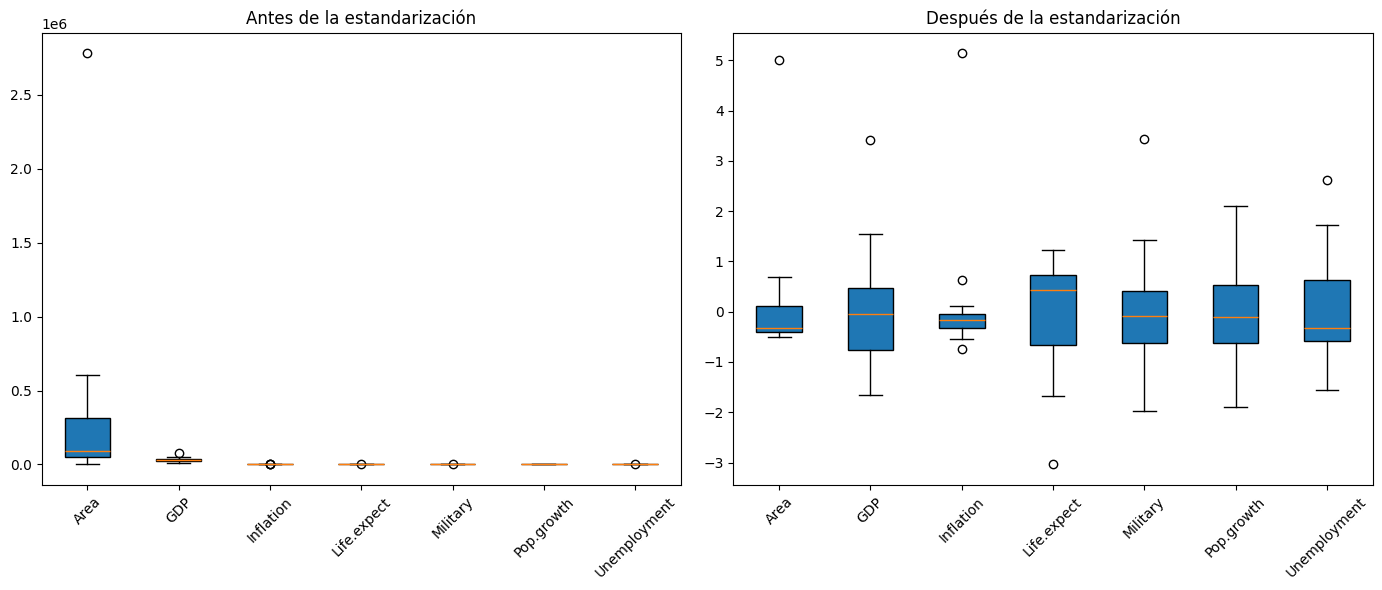

Varianza explicada por cada componente:
- PC1: 0.4005
- PC2: 0.2935
- PC3: 0.1449
- PC4: 0.1041
- PC5: 0.0330
- PC6: 0.0184
- PC7: 0.0056


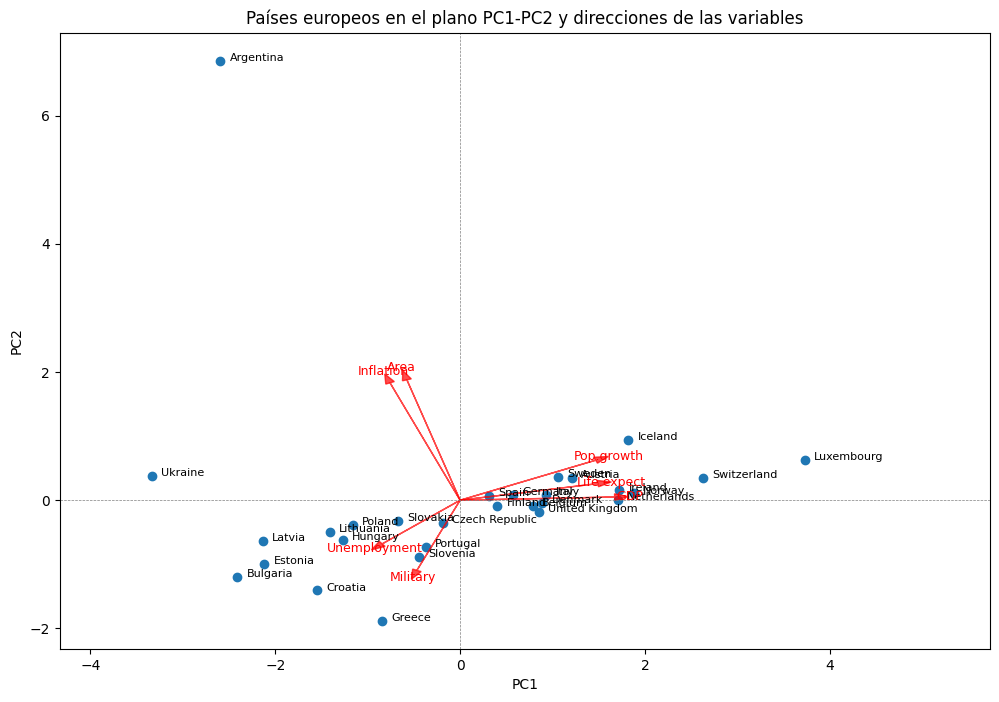

Loadings c/ Argentina:
                   PC1       PC2       PC3       PC4       PC5       PC6  \
Area         -0.192015  0.626007  0.221761  0.163466  0.037734 -0.163004   
GDP           0.557319  0.016679 -0.058725  0.106855 -0.542246 -0.616364   
Inflation    -0.252754  0.610423  0.141763  0.095540 -0.190204 -0.061856   
Life.expect   0.496379  0.086363  0.400713  0.110692  0.708315 -0.196198   
Military     -0.155882 -0.364622  0.521265  0.712503 -0.222100  0.118177   
Pop.growth    0.488847  0.208006  0.340595 -0.244527 -0.322203  0.658263   
Unemployment -0.281030 -0.227037  0.615617 -0.610759 -0.116249 -0.322379   

                   PC7  
Area         -0.683631  
GDP          -0.017728  
Inflation     0.703044  
Life.expect   0.181995  
Military      0.008920  
Pop.growth   -0.069558  
Unemployment -0.004858  
 
Loadings solo Europa:
                   PC1       PC2       PC3       PC4       PC5       PC6  \
Area         -0.124874 -0.172872  0.898297  0.044850 -0.324017  0.19

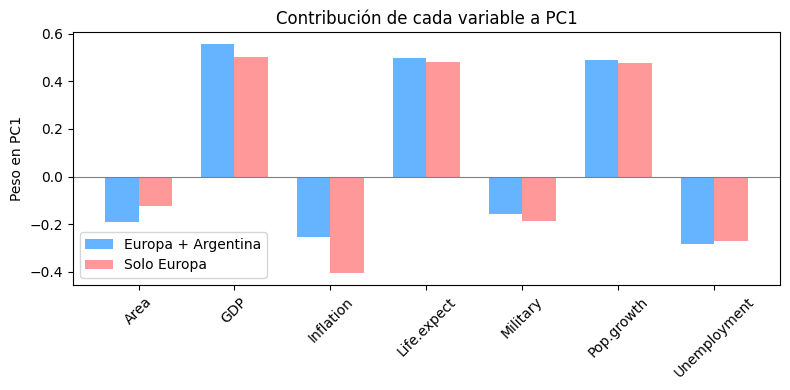

In [49]:
df_arg = pd.read_csv("europe+arg.csv")

# Estandarizar variables numéricas
X_arg = df_arg.drop(columns=["Country"])
scaler = StandardScaler()
X_scaled_arg = scaler.fit_transform(X_arg)
X_scaled_df_arg = pd.DataFrame(X_scaled_arg, columns=X_arg.columns)

# Boxplots variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Antes de la estandarización
axes[0].boxplot(X_arg.values, labels=X_arg.columns, patch_artist=True)
axes[0].set_title("Antes de la estandarización")
axes[0].tick_params(axis='x', rotation=45)
# Después de la estandarización
axes[1].boxplot(X_scaled_df_arg.values, labels=X_scaled_df_arg.columns, patch_artist=True)
axes[1].set_title("Después de la estandarización")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Aplicar PCA
pca_arg = PCA()
X_pca_arg = pca_arg.fit_transform(X_scaled_arg)

print("Varianza explicada por cada componente:")
for i, var in enumerate(pca_arg.explained_variance_ratio_):
    print(f"- PC{i+1}: {var:.4f}")

# Gráfica de los países en el plano de las dos primeras componentes principales
plt.figure(figsize=(12,8))
# 1. Puntos de los países
plt.scatter(X_pca_arg[:,0], X_pca_arg[:,1])
for i, country in enumerate(df_arg["Country"]):
    plt.text(X_pca_arg[i,0]+0.1, X_pca_arg[i,1], country, fontsize=8)
# 2. Vectores de las variables
loadings_arg = pca_arg.components_.T 
variables_arg = X_arg.columns
scaling_factor = 3  
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings_arg[i,0]*scaling_factor, loadings_arg[i,1]*scaling_factor, color='r', alpha=0.7, head_width=0.1)
    plt.text(loadings_arg[i,0]*scaling_factor*1.1, loadings_arg[i,1]*scaling_factor*1.1, var, color='r', ha='center', va='center', fontsize=9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Países europeos en el plano PC1-PC2 y direcciones de las variables")
plt.xlim(X_pca_arg[:,0].min()-1, X_pca_arg[:,0].max()+2)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()


loadings_arg = pd.DataFrame(pca_arg.components_.T, columns=[f'PC{i+1}' for i in range(len(X_arg.columns))], index=X_arg.columns)
print("Loadings c/ Argentina:")
print(loadings_arg)

print(" ")

# Comparo con los anteriores
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)
print("Loadings solo Europa:")
print(loadings)


x = np.arange(len(loadings.index))  
width = 0.35                        

plt.figure(figsize=(8,4))
plt.bar(x - width/2, loadings_arg["PC1"], width=width, label="Europa + Argentina", color="#66b3ff")
plt.bar(x + width/2, loadings["PC1"], width=width, label="Solo Europa", color="#ff9999")

plt.ylabel("Peso en PC1")
plt.title("Contribución de cada variable a PC1")
plt.axhline(0, color='gray', linewidth=0.8)
plt.legend()
plt.xticks(x, loadings.index, rotation=45)
plt.tight_layout()
plt.show()


Se ve cómo, si bien hay algunas diferencias notorias en las variables de inflación, área y GDP (motivo de haber introducido a Argentina en el cálculo de las PCs), las componentes mantienen su sentido y, aproximadamente, su módulo.